In [1]:
import MagmaPandas.geochemistry.volatile_solubility.IaconoMarziano as im
import MagmaPandas.geochemistry.volatile_solubility.Allison2022 as a
import MagmaPandas.geochemistry.volatile_solubility.shiskina as sh
sh_config = sh.shiskina_configuration
sh_config.print()
# print("\n")
# a_config = a.Allison_configuration
# a_config.print()

##### Shiskina volatile solubility #####
########################################
Settings________________________________
Fugacity model.....................ideal
Species model......................mixed

Calibration range______________________
Temperature..................1423-1523°K
Pressure......................0.2-5 kbar


In [2]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.parse.readers as r
import pandas as pd
import elements as e
import numpy as np
import matplotlib.pyplot as plt
import VESIcal as v
config = mp.configuration()

c:\Users\u0123694\miniforge3\envs\py38\lib\site-packages\VESIcal\calculate_classes.py:7: UserWarning: 

  from VESIcal.models import magmasat


In [3]:
melt = mp.read_melt('./melt.csv', index_col=['name'], total_col='total')

In [4]:
melt

,SiO2,Al2O3,MgO,CaO,FeO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3,CO2,H2O,F,S,Cl,total
name,,,,,,,,,,,,,,,,,
PI032-01-01,49.290501,15.263300,5.12422,10.72220,7.80792,4.06566,0.898155,0.122764,2.65568,0.423786,NaN,0.25240,1.453117,0.085167,0.145067,0.037533,98.347469
PI032-01-04,44.997601,15.902700,5.49932,11.48110,9.49287,3.72053,1.452590,0.153070,3.99914,0.613222,NaN,0.25240,1.453117,0.085167,0.145067,0.037533,99.285426
PI032-02-01,51.667000,15.629600,5.05052,10.40640,8.28495,4.18855,0.757615,0.154504,2.29331,0.336159,NaN,0.25240,1.453117,0.085167,0.145067,0.037533,100.741892
PI032-02-02,48.994301,15.871400,4.98146,10.89750,8.26577,3.99706,0.872721,0.103826,2.50407,0.357722,NaN,0.25240,1.453117,0.085167,0.145067,0.037533,98.819113
PI032-02-03,50.633801,15.454400,5.11322,10.57330,7.81633,4.24125,0.764507,0.151526,2.41569,0.339587,NaN,0.25240,1.453117,0.085167,0.145067,0.037533,99.476894
PI032-03-01,46.118500,16.640600,4.37938,11.39660,8.57640,3.95270,1.398740,0.126535,3.85786,0.711321,NaN,0.25240,1.453117,0.085167,0.145067,0.037533,99.131920
PI032-04-01,50.640701,15.413200,5.39519,10.65070,8.59454,3.96215,0.739735,0.127810,2.70186,0.307254,NaN,0.35500,1.526826,0.083600,0.154200,0.036000,100.688765
PI032-04-02,49.386200,15.985700,5.09965,10.23030,8.25471,3.76923,0.994350,0.129516,2.80500,0.355657,NaN,0.37460,1.407353,0.088700,0.174900,0.047100,99.102966
PI032-04-03,50.688000,15.296000,5.43548,10.58260,8.84482,3.37521,0.624146,0.142122,2.02984,0.232097,NaN,0.02760,1.425172,0.083200,0.106100,0.029500,98.921887


In [5]:
sample = "PI032-04-01"
FeO_initial = 15
Fo_host = 0.6
Kd = 0.29
P_bar = 1e3
T_K = 1500
inclusion = melt.loc[sample,:].copy()
# inclusion["H2O"] = 5


In [6]:
s = v.Sample(inclusion[inclusion.index.intersection(v.oxides)])
s.get_composition()

SiO2     50.640701
Al2O3    15.413200
MgO       5.395190
CaO      10.650700
FeO       8.594540
Na2O      3.962150
K2O       0.739735
MnO       0.127810
TiO2      2.701860
P2O5      0.307254
Cr2O3          NaN
CO2       0.355000
H2O       1.526826
dtype: float64

In [7]:
v.get_model_names()

['ShishkinaIdealMixing',
 'Dixon',
 'IaconoMarziano',
 'Liu',
 'ShishkinaCarbon',
 'ShishkinaWater',
 'DixonCarbon',
 'DixonWater',
 'IaconoMarzianoCarbon',
 'IaconoMarzianoWater',
 'AllisonCarbon',
 'AllisonCarbon_sunset',
 'AllisonCarbon_sfvf',
 'AllisonCarbon_erebus',
 'AllisonCarbon_vesuvius',
 'AllisonCarbon_etna',
 'AllisonCarbon_stromboli',
 'MooreWater',
 'LiuWater',
 'LiuCarbon']

In [17]:
print(f"{'Sample': <15}{'VESIcal':<10}{'Me':<10}{'delta': <7}{'X-H2O': >}")
for idx in range(20):

    inclusion = melt.iloc[idx,:]
    s = v.Sample(inclusion[inclusion.index.intersection(v.oxides)])
    model = "IaconoMarziano"
    VC = v.calculate_saturation_pressure(s, temperature=T_K-273, model=model).result
    # IM, xIM = im.calculate_saturation(inclusion, T_K, output="both")
    A, xA = a.calculate_saturation(inclusion, T_K, output="both")
    # SH, x = sh.mixed.calculate_saturation(inclusion, output="both")
    # string = f"IM: {IM:>5.0f}, A: {A:>5.0f}"    
    print(f"{inclusion.name:<15}{VC:<10.0f}{A:<10.0f}{(VC - A): <7.0f}{xA: >.2f}")
    # print(f"VESIcal: {VC:<10.0f} {string:>25}, delta: {(VC - IM): >3.0f} bar, Xfl-IM: {xim: >4.2f}, Xfl-A: {x: .2f}")

Sample         VESIcal   Me        delta  X-H2O
PI032-01-01    3078      2484      594    0.08
PI032-01-04    2545      2703      -158   0.07
PI032-02-01    3291      2489      802    0.08
PI032-02-02    3077      2657      420    0.07
PI032-02-03    3162      2460      702    0.08
PI032-03-01    2714      3034      -320   0.06
PI032-04-01    4207      3253      954    0.06
PI032-04-02    4348      3959      389    0.04
PI032-04-03    754       434       320    0.47
PI032-05-01    2768      3510      -742   0.05
PI041-02-01    3446      3357      89     0.06
PI041-02-02    1985      2199      -214   0.02
PI041-03-01    3626      3745      -119   0.00
PI041-03-03    3574      3849      -276   0.00
PI041-04-02    3425      4533      -1108  0.00
PI041-04-03    3467      4523      -1056  0.00
PI041-04-04    3420      4394      -974   0.00
PI041-04-05    3549      4650      -1101  0.00
PI041-04-06    3663      4402      -739   0.00
PI041-04-07    3702      4627      -925   0.00


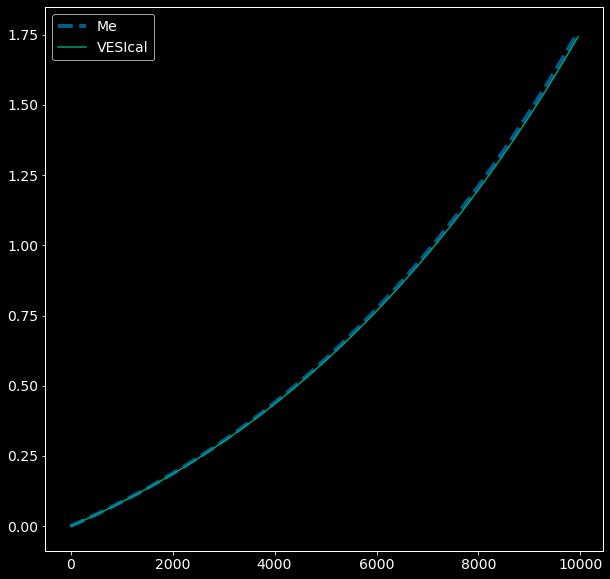

In [24]:
model = "IaconoMarzianoCarbon"

p = np.arange(1,  1e4, 5e1)
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(p, [im.co2.calculate_solubility(inclusion, P_bar=i, T_K=T_K) for i in p], label="Me", linewidth=4, alpha=0.8, linestyle="--")
plt.plot(p, [v.calculate_dissolved_volatiles(s, temperature=T_K-273.15, pressure=i, model=model).result for i in p], label="VESIcal")

plt.legend()
plt.show()

In [15]:
melt.iloc[0, :]

SiO2     49.290501
Al2O3    15.263300
MgO       5.124220
CaO      10.722200
FeO       7.807920
Na2O      4.065660
K2O       0.898155
MnO       0.122764
TiO2      2.655680
P2O5      0.423786
Cr2O3          NaN
CO2       0.252400
H2O       1.453117
F         0.085167
S         0.145067
Cl        0.037533
total    98.347469
Name: PI032-01-01, dtype: float64